## Business Analytics And Data Science Internship (The Sparks Foundation)
### TSF- Task5 Exploratory data Analysis of 'Indian Premier League'
### Performing 'Exploratory data Analysis' for finding the most successful teams, players and factors contributing win or loss of team And suggesting teams or players a company should endorse for its products
### Author - Ashish Kapasiya


In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import dataset
df = pd.read_csv('matches.csv')
df1 = pd.read_csv('deliveries.csv')

In [3]:
# read first 5 row
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
# read last 5 row
df1.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [6]:
## they give me how many row and columns in the dataset
print(df.shape)
print(df1.shape)

(756, 18)
(179078, 21)


In [9]:
## they give me information about the data 
print(df.info())
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 68.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
match_id            179078 non

In [14]:
## we can describe both numerical and categorical value
print(df.describe(include= 'all'))
print(df1.describe(include= 'all'))

                  id       season    city        date           team1  \
count     756.000000   756.000000     749         756             756   
unique           NaN          NaN      32         546              15   
top              NaN          NaN  Mumbai  2010-03-25  Mumbai Indians   
freq             NaN          NaN     101           2             101   
mean     1792.178571  2013.444444     NaN         NaN             NaN   
std      3464.478148     3.366895     NaN         NaN             NaN   
min         1.000000  2008.000000     NaN         NaN             NaN   
25%       189.750000  2011.000000     NaN         NaN             NaN   
50%       378.500000  2013.000000     NaN         NaN             NaN   
75%       567.250000  2016.000000     NaN         NaN             NaN   
max     11415.000000  2019.000000     NaN         NaN             NaN   

                              team2     toss_winner toss_decision  result  \
count                           756           

In [15]:
## they define the columns name
print(df.columns)
print(df1.columns)

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [25]:
## Names of IPL teams 
df['team1'].unique().tolist()

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Gujarat Lions',
 'Rising Pune Supergiant',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Delhi Daredevils',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Deccan Chargers',
 'Kochi Tuskers Kerala',
 'Pune Warriors',
 'Rising Pune Supergiants',
 'Delhi Capitals']

## Treatment of missing values

In [26]:
# Treatment the missing value of matches dataset
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## There are missing values in city,winner,Player of match,umpire(1,2,3)

In [27]:
# ## As umpire(1,2,3) column is not relevant in our analysis so I have just dropped it 
df.drop(['umpire1','umpire2','umpire3'], axis=1, inplace=True)

In [28]:
df[['city','venue']].loc[df['city'].isnull()]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


### City has missing values. But the venue of the same matches is Dubai International Cricket Statidum, so we can fill the missing value in city as Dubai

In [31]:
df['city'].fillna('Dubai',inplace=True)

In [33]:
df[df['winner'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium


### we can find both the null value of winner and player of match and My self analysis said that the match was cancelled because of the rain

In [40]:
df.dropna(inplace=True)

In [41]:
## check duplicate value
df.duplicated().sum()

0

In [42]:
# Treatment the missing value of deliveries dataset
df1.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [48]:
# there are so many null value that why drop these columns except fielder bcoz there useful for analysis 
df1.drop(['player_dismissed','dismissal_kind'],axis=1, inplace=True)

# 1. finding the most successful teams

Text(0.5, 0, 'IPL Teams')

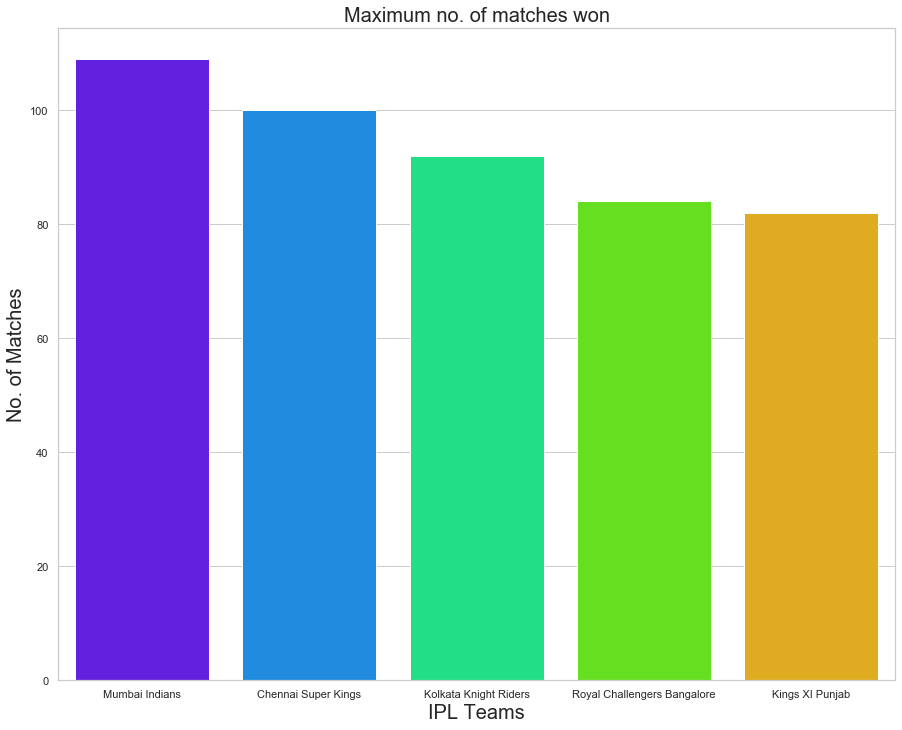

In [96]:
sns.countplot(x='winner',data=df,order=df['winner'].value_counts().iloc[:5].index,palette='gist_rainbow_r')
sns.set(rc={'figure.figsize':(15,7)})
plt.title('Maximum no. of matches won',fontsize=20)
sns.set_style('whitegrid')
plt.ylabel('No. of Matches',fontsize=20)
plt.xlabel('IPL Teams',fontsize=20)

### Answer: - Mumbai Indians is most successful team 

#  2.finding the most successful player

Text(0.5, 0, 'Names of Players')

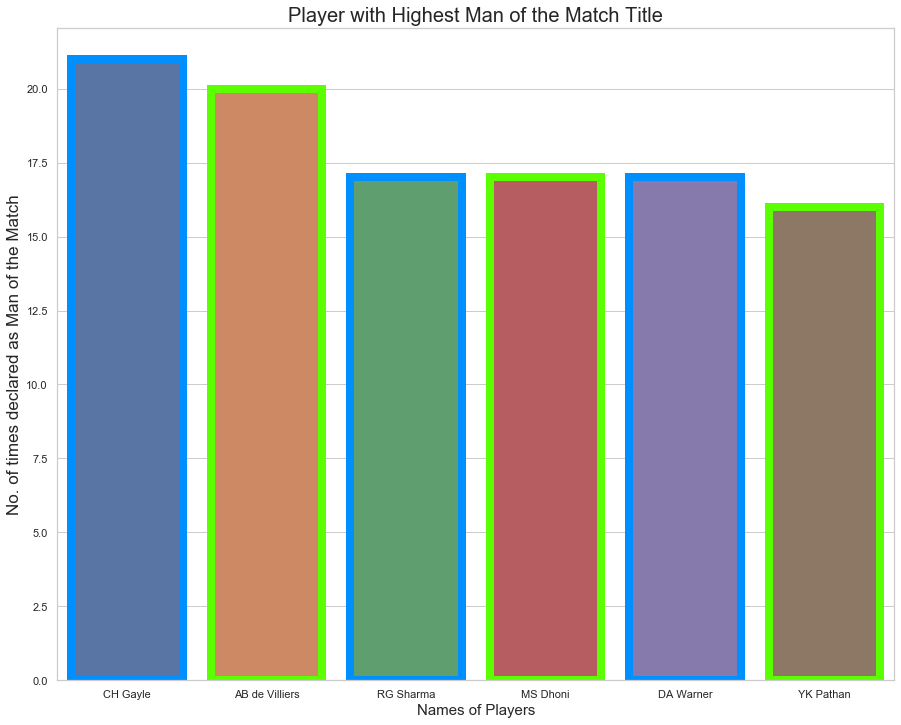

In [56]:
sns.countplot(x='player_of_match',data=df,order=df['player_of_match'].value_counts().iloc[:6].index,linewidth=8,edgecolor=sns.color_palette('gist_rainbow_r',2))
plt.ylabel('No. of times declared as Man of the Match',fontsize=17)
plt.title('Player with Highest Man of the Match Title',fontsize=20)
plt.xlabel('Names of Players',fontsize='15')

In [61]:
batsman=df1[['batting_team','batsman','total_runs']]
best_player=batsman.groupby(['batsman','batting_team']).count().sort_values(by='total_runs',ascending=False)
best_player.head()

,,total_runs
batsman,batting_team,
V Kohli,Royal Challengers Bangalore,4211
SK Raina,Chennai Super Kings,3413
RG Sharma,Mumbai Indians,2907
MS Dhoni,Chennai Super Kings,2837
G Gambhir,Kolkata Knight Riders,2533


### Conclusion : Chris Gayle and Virat kholi both are best bastman but Chris Gayle is the player who won the most player of the match awards and hence is the most valuable player.

In [64]:
df1['fielder'].value_counts().sort_values(ascending=False)

MS Dhoni            159
KD Karthik          152
RV Uthappa          125
SK Raina            115
AB de Villiers      114
                   ... 
C Ingram              1
S Warrier             1
Mashrafe Mortaza      1
Shivam Sharma         1
WP Saha (sub)         1
Name: fielder, Length: 499, dtype: int64

### M.S Dhoni Is best fielder player 

# 3.Factors contributing win or loss of team

In [84]:
df.groupby(['winner','toss_decision']).toss_winner.count()

winner                       toss_decision
Chennai Super Kings          bat              52
                             field            48
Deccan Chargers              bat              14
                             field            15
Delhi Capitals               bat               2
                             field             8
Delhi Daredevils             bat              29
                             field            38
Gujarat Lions                bat               2
                             field            11
Kings XI Punjab              bat              21
                             field            61
Kochi Tuskers Kerala         field             6
Kolkata Knight Riders        bat              35
                             field            57
Mumbai Indians               bat              45
                             field            64
Pune Warriors                bat               9
                             field             3
Rajasthan Royals          

Text(0.5, 0, 'IPL Teams with maximum toss wins')

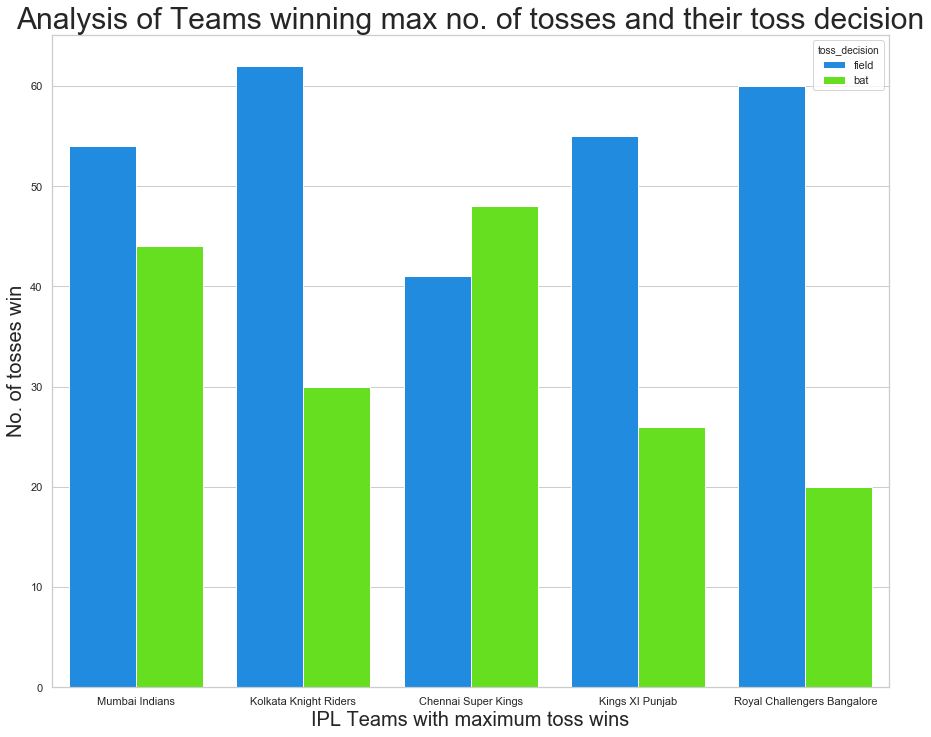

In [75]:
sns.countplot(x='toss_winner',hue='toss_decision',data=df,order=df['toss_winner'].value_counts().iloc[:5].index,palette='gist_rainbow_r')
plt.title('Analysis of Teams winning max no. of tosses and their toss decision',fontsize=30)
plt.ylabel('No. of tosses win',fontsize=20)
plt.xlabel('IPL Teams with maximum toss wins',fontsize=20)

### The top 5 winners who won the maximum matches in the IPL history have also the same record of winning maximum tosses. Mumbai Indian has the highest record of winning maximum tosses and 4 out of 5 teams with maximum toss winning has chosen fielding

## Note: - with the help of describe function we can answer many of question example
   ### The biggest margin of victory for the team batting first(win_by_runs) is 146 runs.
   ### The biggest victory of the team batting second(win_by_wickets) is by 10 wickets.
   ### 75% of the victorious teams that bat first won by a margin of 19 runs.
   ### 75% of the victorious teams that bat second won by a margin of 6 wickets.
   ### Eden Gardens has hosted the maximum number of IPL matches.
   ### HDPK Dharmasena and S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field.